# Module 2: Exploratory Data Analysis


### The project’s goal is to track the impact of living conditions of students under the aged between 15 and 22 years on their math performance in order to identify students at risk at an early stage.

### And you can do this using a model that predicts the results of the state examination in mathematics for each student of the school. To determine the parameters of the future model, conduct an intelligence analysis of the data and compile a report on its results.

### An approximation model should be built to predict exam mark for each student. To get a training sample it's necessary to select important features from given dataset stud_math.csv.”



In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [99]:
pip install autopep8

Note: you may need to restart the kernel to use updated packages.


In [3]:
# let's open dataset file and get it's basic info

df = pd.read_csv('stud_math.xls')
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# let's check columns' names

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
#let's change the columns name for a standard lower letter naming

df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
                     'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']

In [6]:
# and we check columns' new names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   mother_edu           392 non-null    float64
 7   father_edu           371 non-null    float64
 8   mother_job           376 non-null    object 
 9   father_job           359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
# let's check which columns have NaN or empty values

df.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
mother_edu              3
father_edu             24
mother_job             19
father_job             36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [8]:
# As our study is based on the math examinations of the students and the future approximation model "score" 
# has 6 NaN values, I belive it's best to delete these 6 NaN values. 

df = df[df['score'].apply(lambda x: pd.isna(x) != True)]
df

,school,sex,age,address,famsize,pstatus,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [60]:
# let's do analisys of numerical columns, as we can see there only two of them: "age" and "absences"
# the rest of columns that contain numbers they are defined by levels
# columns with discrete values and categorical values, will be analyzed later on

# to find outliers let's define function of histogram and boxplot:

def get_hist_box(column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(df[column])
    axes[0].set_xlabel(column)

    sns.boxplot(y=df[column])

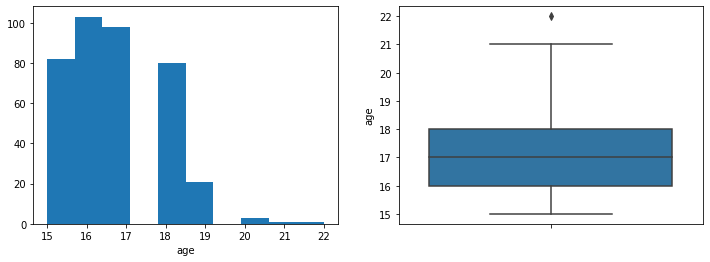

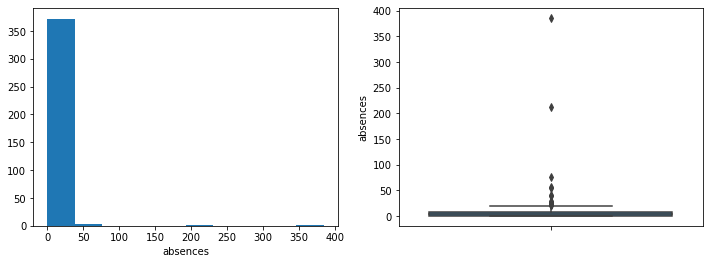

In [61]:
for column in ['age', 'absences']:
    get_hist_box(column)

In [ ]:
# now we see somebody with age of 22 y.o., but as this age is within our focus group, we keep it in the data

In [63]:
# let's check the outliers limits for absences

IQR_1 = df.absences.quantile(q=0.25, interpolation='midpoint')
IQR_3 = df.absences.quantile(q=0.75, interpolation='midpoint')
IQR = IQR_3 - IQR_1
upper_outliers = df.absences[df.absences > IQR_3+1.5*IQR]
display(upper_outliers)


40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64

In [ ]:
# we can see two outliers: 385.0 and 212.0

In [64]:
# let's check frequency of values

df.absences.value_counts()

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [65]:
# let's delete the two outliers: 385.0 and 212.0

df = df[(df.absences != 212) & (df.absences != 385)]
display(df)

,school,sex,age,address,famsize,pstatus,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,urban,NaN,apart,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,urban,greater_3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,urban,less_3,together,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,urban,greater_3,together,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,urban,greater_3,together,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,urban,greater_3,together,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,urban,less_3,together,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,region,greater_3,together,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,region,less_3,together,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [66]:
# let's see how we should replace NaN values for absences colums
# we start from calculation median and mean values

mean = df.absences.mean()
median = df.absences.median()
nan_value = df.absences.isna().sum()
print('mean = {}, median = {}, nan_value = {}'.format(mean, median, nan_value))

mean = 5.7712765957446805, median = 4.0, nan_value = 11


In [67]:
# let's make a function to replace NaN values in columns

def nan_replace(column, value):
    df[column] = df[column].apply(lambda x: value if pd.isna(x) == True else x)

In [70]:
# let's put 5 as the result of mean and median that we have cancultated 
# and check again presents of NaN values in absences

nan_replace('absences', 5)
print(df.absences.isna().sum())

0


In [71]:
# let's analize nominative features

In [72]:
# let's defining value_counts function

def value_counts_func(column):
    moda = df[column].value_counts()
    nan_value = df[column].isna().sum()
    print('{}, nan_value = {}'.format(moda, nan_value))

In [73]:
# let's see the results

for column in df.columns[(df.columns != 'age') & (df.columns != 'absences') & (df.columns != 'score')]:
    value_counts_func(column)

GP    343
MS     44
Name: school, dtype: int64, nan_value = 0
F    203
M    184
Name: sex, dtype: int64, nan_value = 0
urban     289
region     83
Name: address, dtype: int64, nan_value = 15
greater_3    254
less_3       106
Name: famsize, dtype: int64, nan_value = 27
together    307
apart        35
Name: pstatus, dtype: int64, nan_value = 45
4.0    131
2.0     98
3.0     96
1.0     56
0.0      3
Name: mother_edu, dtype: int64, nan_value = 3
2.0    104
3.0     93
4.0     89
1.0     75
0.0      2
Name: father_edu, dtype: int64, nan_value = 24
other       127
services     96
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64, nan_value = 19
other       194
services     98
teacher      28
at_home      16
health       15
Name: father_job, dtype: int64, nan_value = 36
course        134
reputation    102
home          101
other          33
Name: reason, dtype: int64, nan_value = 17
mother    247
father     86
other      24
Name: guardian, dtype: int64, nan_value =

In [74]:
# let's change 40 for 4 in father_edu, as highly likely this is a typo
df.father_edu = df.father_edu.apply(lambda x: 4. if x == 40. else x)
pd.DataFrame(df.father_edu.value_counts())

,father_edu
2.0,104
3.0,93
4.0,89
1.0,75
0.0,2


In [76]:
# let's change -1 for 1 for famrel, as highly likely this is a typo
df.famrel = df.famrel.apply(lambda x: 1. if x == -1. else x)
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,178
5.0,96
3.0,62
2.0,16
1.0,8


In [77]:
# let's replace NaN values in nominative features with the most common value

for column in ['address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
               'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
               'freetime', 'goout', 'health']:
    nan_replace(column, df[column].value_counts().index[0])

print(df.isna().sum())
display(df)

school                 0
sex                    0
age                    0
address                0
famsize                0
pstatus                0
mother_edu             0
father_edu             0
mother_job             0
father_job             0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64


,school,sex,age,address,famsize,pstatus,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,urban,greater_3,apart,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,urban,greater_3,together,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,urban,less_3,together,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,urban,greater_3,together,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,urban,greater_3,together,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,urban,greater_3,together,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,urban,less_3,together,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,region,greater_3,together,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,region,less_3,together,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [78]:
# now we see the dataset without any NaN or empty values

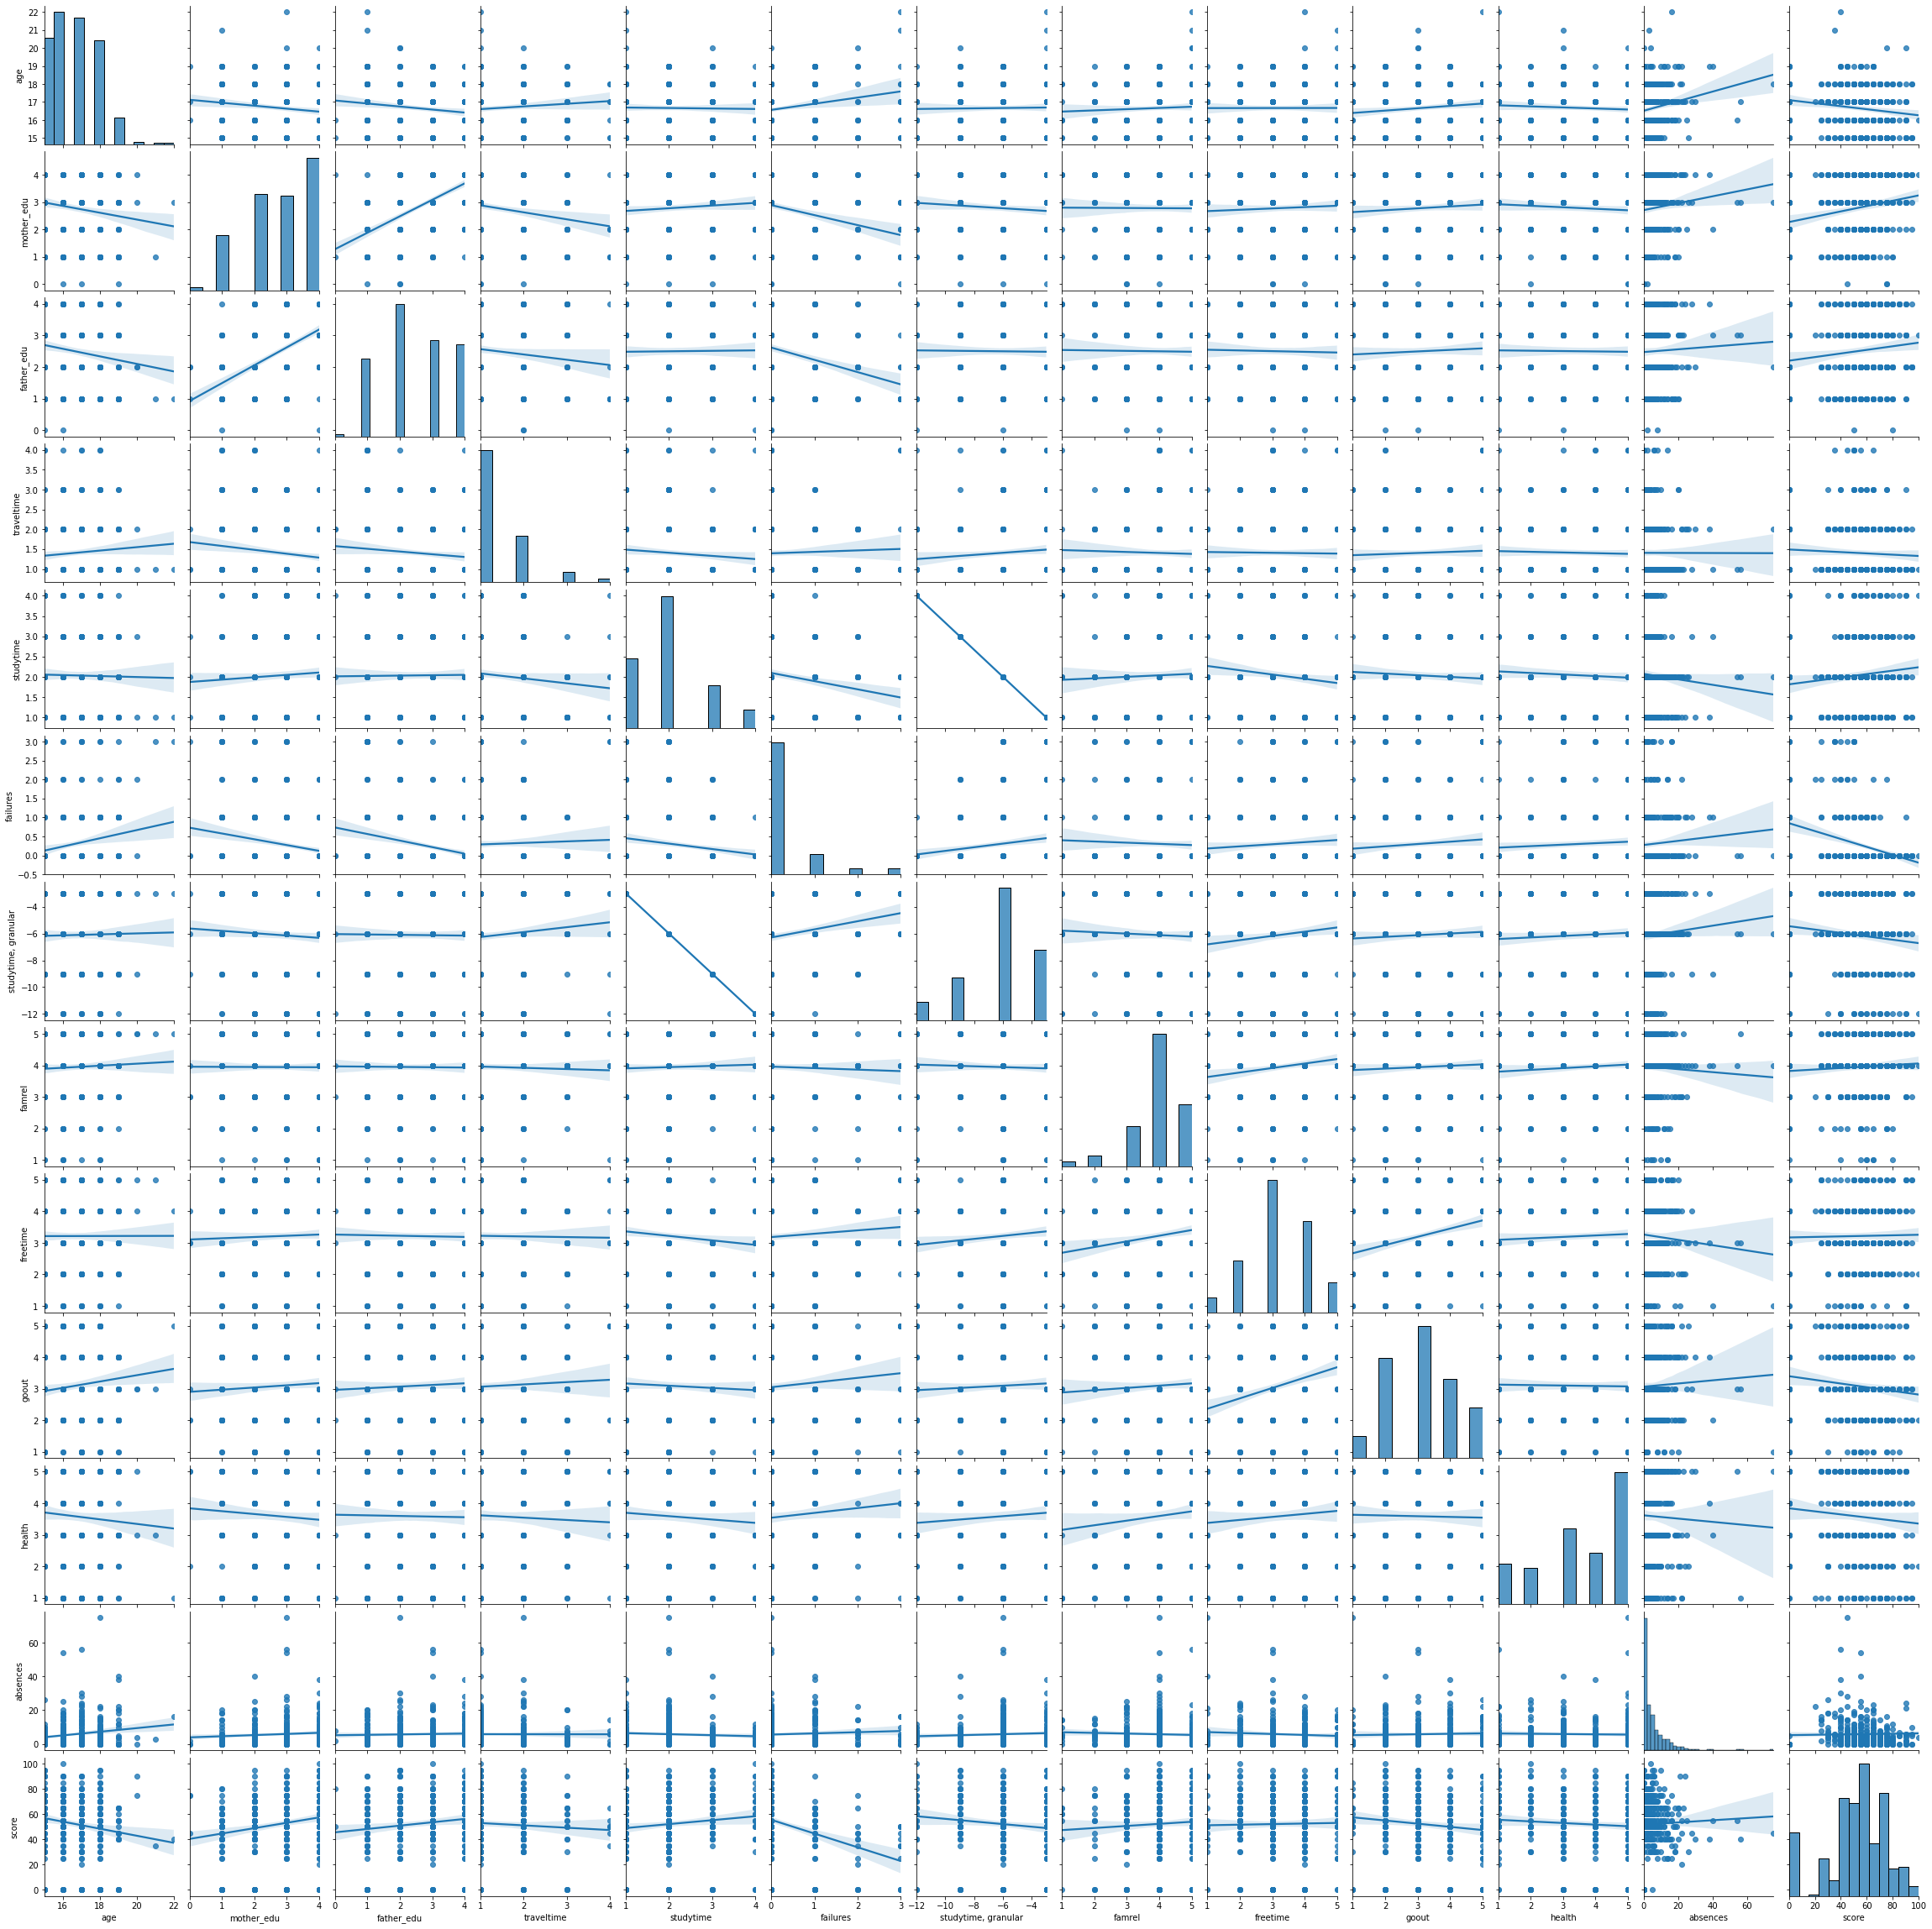

In [81]:
# let's go on with correlation analysis
sns.pairplot(df, kind='reg')

In [82]:
# let's calculate correlation coefficients for numerical variables
correlation = df.corr()
display(correlation)

,age,mother_edu,father_edu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.143429,-0.141431,0.080071,-0.017954,0.192816,0.017954,0.046539,0.001401,0.114612,-0.064947,0.170053,-0.153488
mother_edu,-0.143429,1.000000,0.584400,-0.158633,0.075977,-0.236824,-0.075977,-0.004969,0.043911,0.068810,-0.070762,0.092702,0.203759
father_edu,-0.141431,0.584400,1.000000,-0.107416,0.011731,-0.259510,-0.011731,-0.011425,-0.020312,0.050007,-0.014924,0.032841,0.123111
traveltime,0.080071,-0.158633,-0.107416,1.000000,-0.098450,0.038437,0.098450,-0.031054,-0.014313,0.045023,-0.035570,-0.001263,-0.055020
studytime,-0.017954,0.075977,0.011731,-0.098450,1.000000,-0.170471,-1.000000,0.038154,-0.122410,-0.053970,-0.063912,-0.064672,0.114737
failures,0.192816,-0.236824,-0.259510,0.038437,-0.170471,1.000000,0.170471,-0.038989,0.077106,0.095156,0.077371,0.062239,-0.337138
"studytime, granular",0.017954,-0.075977,-0.011731,0.098450,-1.000000,0.170471,1.000000,-0.038154,0.122410,0.053970,0.063912,0.064672,-0.114737
famrel,0.046539,-0.004969,-0.011425,-0.031054,0.038154,-0.038989,-0.038154,1.000000,0.159923,0.056925,0.090730,-0.043226,0.062745
freetime,0.001401,0.043911,-0.020312,-0.014313,-0.122410,0.077106,0.122410,0.159923,1.000000,0.292406,0.066322,-0.069252,0.019910
goout,0.114612,0.068810,0.050007,0.045023,-0.053970,0.095156,0.053970,0.056925,0.292406,1.000000,-0.017873,0.036700,-0.121098


In [83]:
# we can find  a negative correlation between studytime and column studytime, granular
# let's delete the column studytime, granular

df = df.drop(['studytime, granular'], axis=1)
display(df)

,school,sex,age,address,famsize,pstatus,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,urban,greater_3,apart,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,urban,greater_3,together,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,urban,less_3,together,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,urban,greater_3,together,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,urban,greater_3,together,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,urban,greater_3,together,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,urban,less_3,together,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,region,greater_3,together,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,region,less_3,together,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [86]:
# let's fulfil correlation information and visualize it's effect of each nominative feature

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

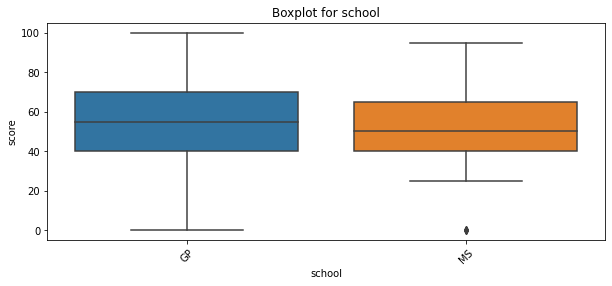

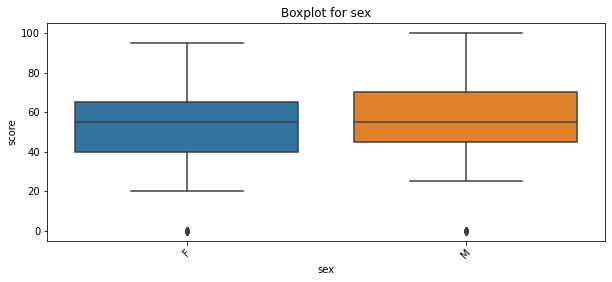

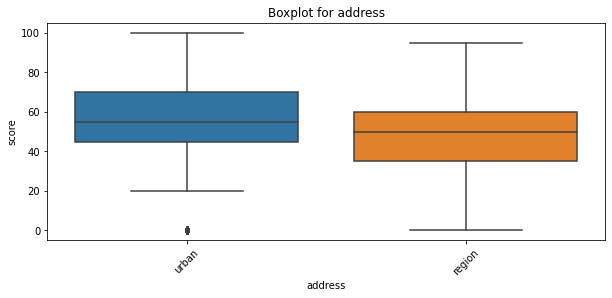

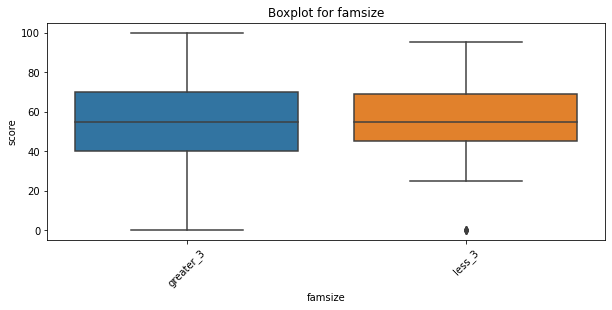

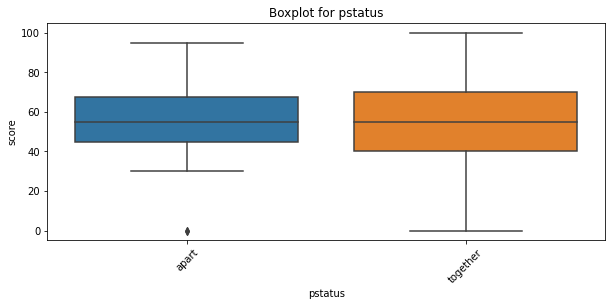

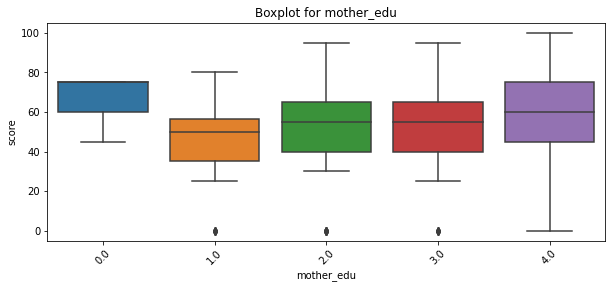

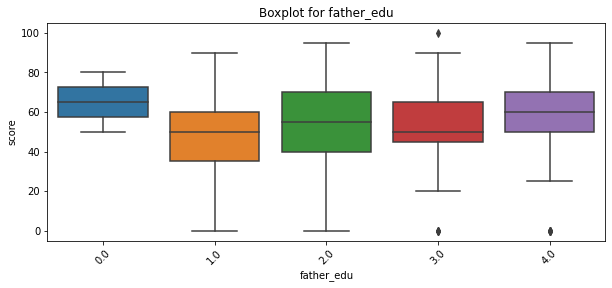

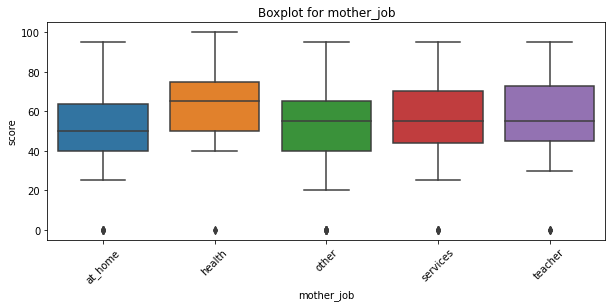

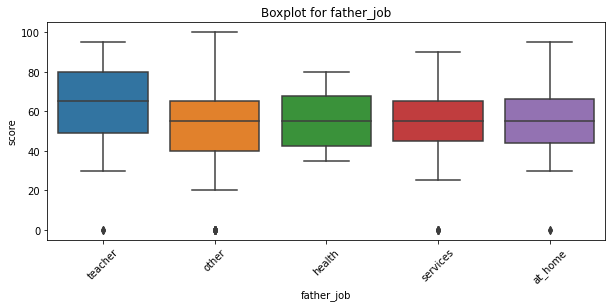

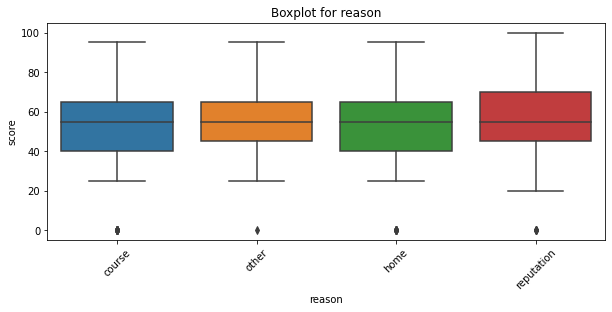

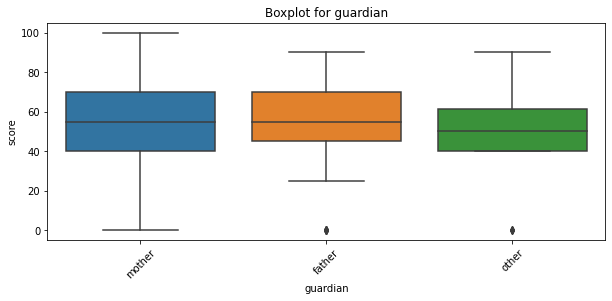

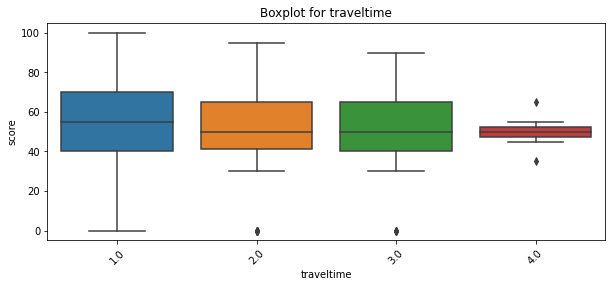

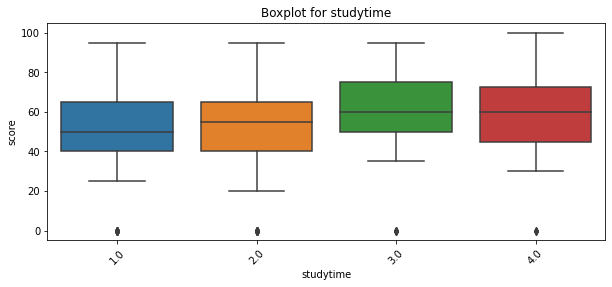

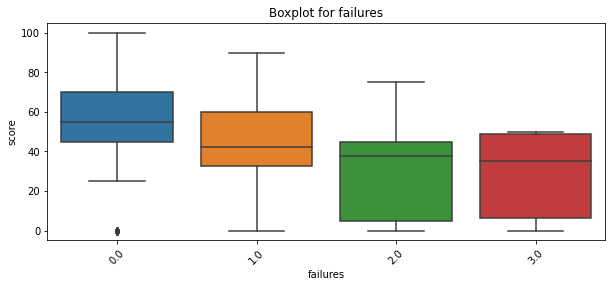

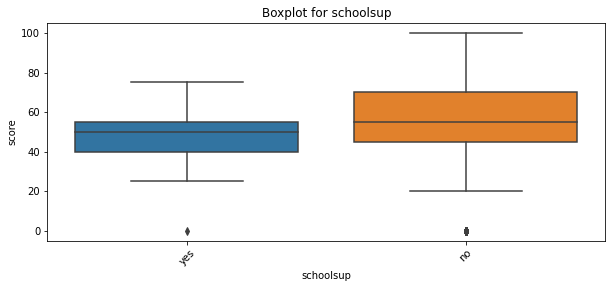

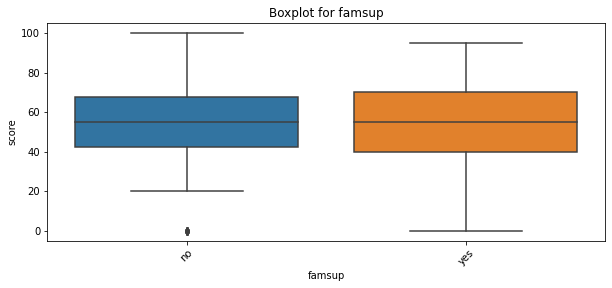

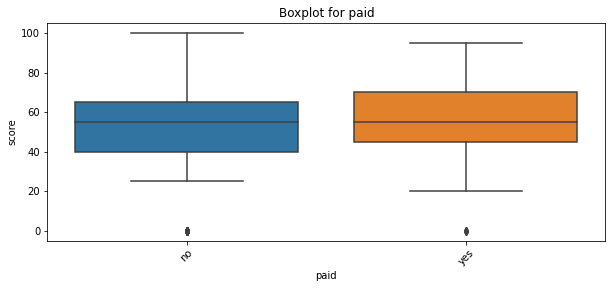

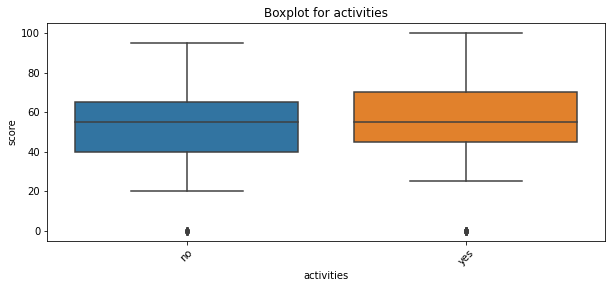

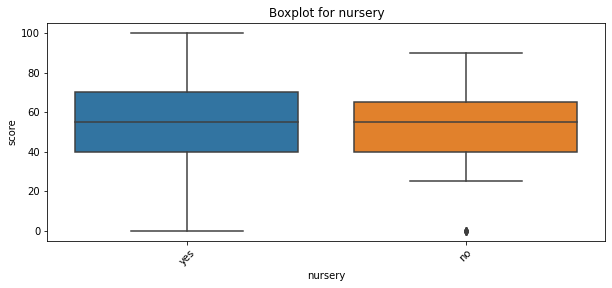

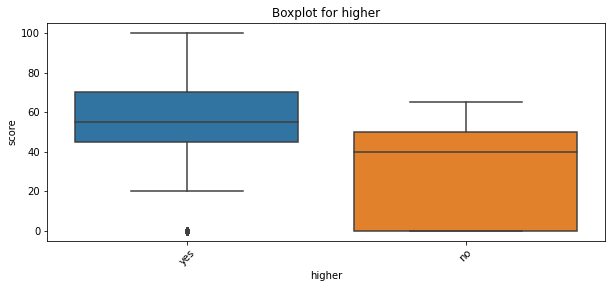

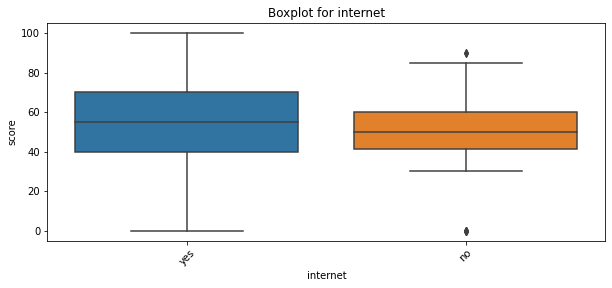

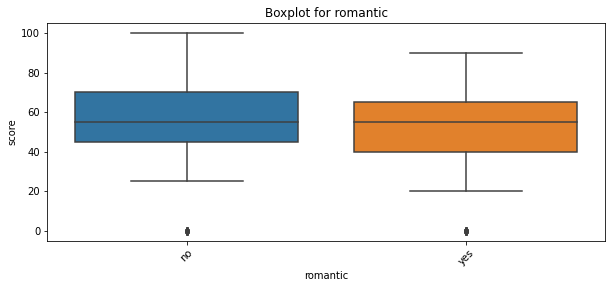

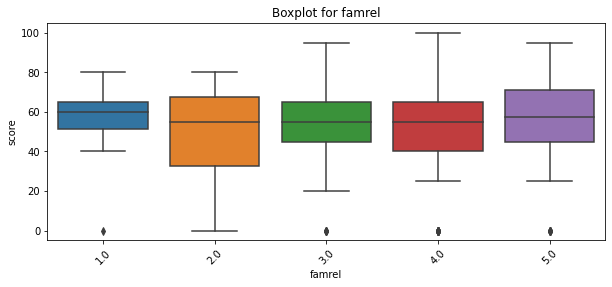

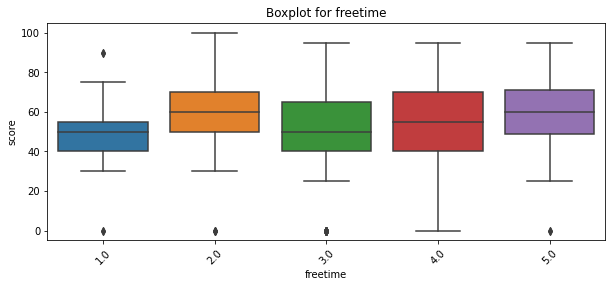

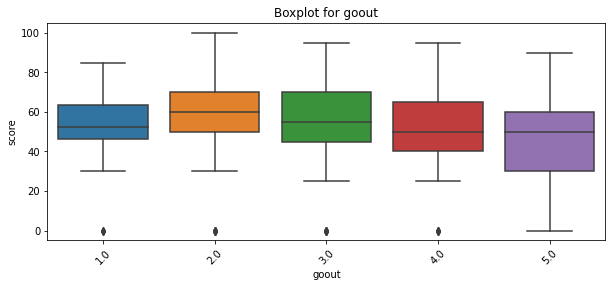

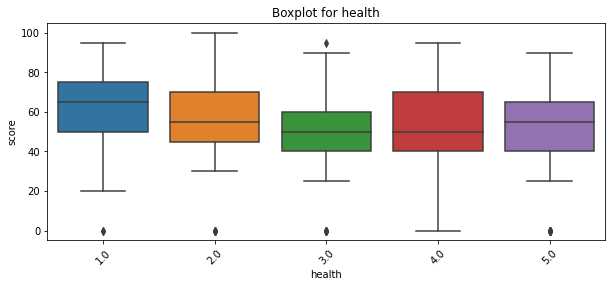

In [87]:
for column in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mother_edu', 'father_edu',
               'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
               'health']:
    get_boxplot(column)

In [95]:
# as we can see all variable have some impact to the score
# let's determine statistically significant differences for the columns with the function

def get_stat(column):
    col = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(col, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Statistically significant differences are found for the following column', column)
            break

In [96]:
for column in df.columns[:-1]:
    get_stat(column)

Statistically significant differences are found for the following column sex
Statistically significant differences are found for the following column address
Statistically significant differences are found for the following column mother_edu
Statistically significant differences are found for the following column mother_job
Statistically significant differences are found for the following column failures
Statistically significant differences are found for the following column paid
Statistically significant differences are found for the following column higher
Statistically significant differences are found for the following column romantic
Statistically significant differences are found for the following column absences


In [ ]:
# as we can see on the basis of correlation and statistical analysis
# the following features have statistically significant differences
# sex, age, address, mother_edu, mother_job, failures, paid, higher, romantic and absences

In [97]:
df_model = df.loc[:, ['sex', 'age', 'address', 'mother_edu', 'mother_job',
                              'failures', 'paid', 'higher', 'romantic', 'absences', 'score']]
display(df_model)

,sex,age,address,mother_edu,mother_job,failures,paid,higher,romantic,absences,score
0,F,18,urban,4.0,at_home,0.0,no,yes,no,6.0,30.0
1,F,17,urban,1.0,at_home,0.0,no,yes,no,4.0,30.0
2,F,15,urban,1.0,at_home,3.0,no,yes,no,10.0,50.0
3,F,15,urban,4.0,health,0.0,yes,yes,yes,2.0,75.0
4,F,16,urban,3.0,other,0.0,yes,yes,no,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,urban,1.0,other,1.0,no,yes,no,0.0,0.0
391,M,17,urban,3.0,services,0.0,no,yes,no,3.0,80.0
392,M,21,region,1.0,other,3.0,no,yes,no,3.0,35.0
393,M,18,region,3.0,services,0.0,no,yes,no,0.0,50.0


# Final conclusions

### There are not too many NaN values in the dataset. But some of them were found in the score column, therefor it was important to delete them as our study is based on the math examinations of the students and the future approximation model "score".

### There are only 2 columns are numerical in the dataset, they are age and absences.

### There were found 3 outliers in whole dataset: 40 in 'father’s education', which I have replaced for 4 as I believe it’s a typo, than father´s education -1 in 'family relationships' which I have replaced for 1 as I believe it’s a typo as well. 
### And finally 22 in age, which I have not change or delete as this age is within our focus group.

### The column studytime and studytime, granular had a negative correlation; therefor I have deleted it from the dataset. 

### As we can see on the basis of correlation and statistical analysis  the following features have statistically significant differences sex, age, address', mother’s education', mother’s job, failures, paid, higher, romantic, absences. 
